In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load Dataset
file_path = "/content/Bank Customer Churn Prediction.csv"  # Ensure this file is in your working directory
df = pd.read_csv(file_path)

In [ ]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [ ]:
df.shape

(10000, 12)

In [ ]:
df.isnull().sum()

,0
customer_id,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0


In [ ]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.country.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
df["tenure"].value_counts()

,count
tenure,
2,1048
1,1035
7,1028
8,1025
5,1012
3,1009
4,989
9,984
6,967


In [ ]:
df["products_number"].value_counts()

,count
products_number,
1,5084
2,4590
3,266
4,60


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Encode categorical variables (Gender)
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])  # 0 for Female, 1 for Male

In [ ]:
# One-hot encoding for 'country' (dropping first column to avoid dummy variable trap)
df = pd.get_dummies(df, columns=['country'], drop_first=True)

In [ ]:
df.head()

,customer_id,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain
0,15634602,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,15647311,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,15619304,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,15701354,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,15737888,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


In [ ]:
# Define features (X) and target (y)
X = df.drop(columns=['customer_id', 'churn'])  # Removing non-relevant columns
y = df['churn']

In [ ]:
# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
# Standardize features (improves performance for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
# Get model coefficients and intercept
beta_0 = log_reg.intercept_[0]  # Intercept
beta_values = log_reg.coef_[0]  # Coefficients

In [ ]:
# Mapping feature names to their respective coefficients
feature_names = X.columns
beta_dict = dict(zip(feature_names, beta_values))

In [ ]:
# Construct the logistic regression equation (Excluding Country Variables)
equation_str = f"P(Churn) = 1 / (1 + e^(-({beta_0:.4f}"
for feature in feature_names:
    if "country" not in feature:  # Exclude country variables
        equation_str += f" + {beta_dict[feature]:.4f} * {feature}"
equation_str += ")))"

In [ ]:
# Print the logistic regression equation
print("Logistic Regression Equation:")
print(equation_str)

Logistic Regression Equation:
P(Churn) = 1 / (1 + e^(-(-1.6459 + -0.0860 * credit_score + -0.2609 * gender + 0.7388 * age + -0.0201 * tenure + 0.1606 * balance + -0.0703 * products_number + -0.0322 * credit_card + -0.5155 * active_member + 0.0477 * estimated_salary)))


In [ ]:
# Model Evaluation - Confusion Matrix
y_pred = log_reg.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, y_pred)

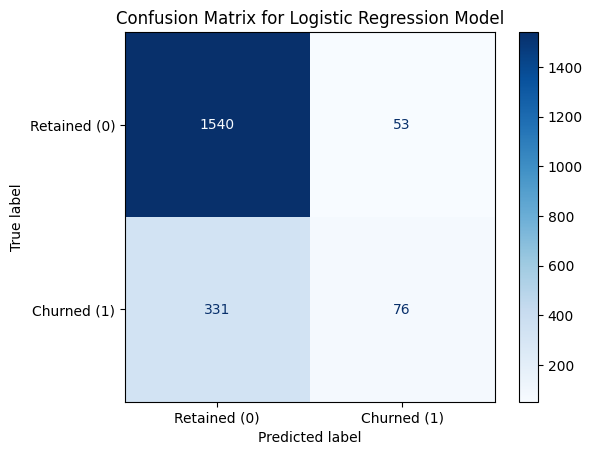

In [ ]:
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Retained (0)", "Churned (1)"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix for Logistic Regression Model")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Model Evaluation Metrics:
Accuracy: 0.8080
Precision: 0.5891
Recall: 0.1867
F1 Score: 0.2836


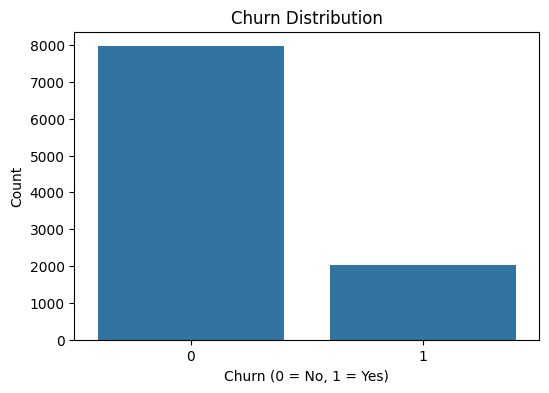

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (assuming it is in a CSV file)
df = pd.read_csv("/content/Bank Customer Churn Prediction.csv")

# Plot Churn Distribution
plt.figure(figsize=(6,4))
sns.countplot(x=df["churn"])
plt.title("Churn Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

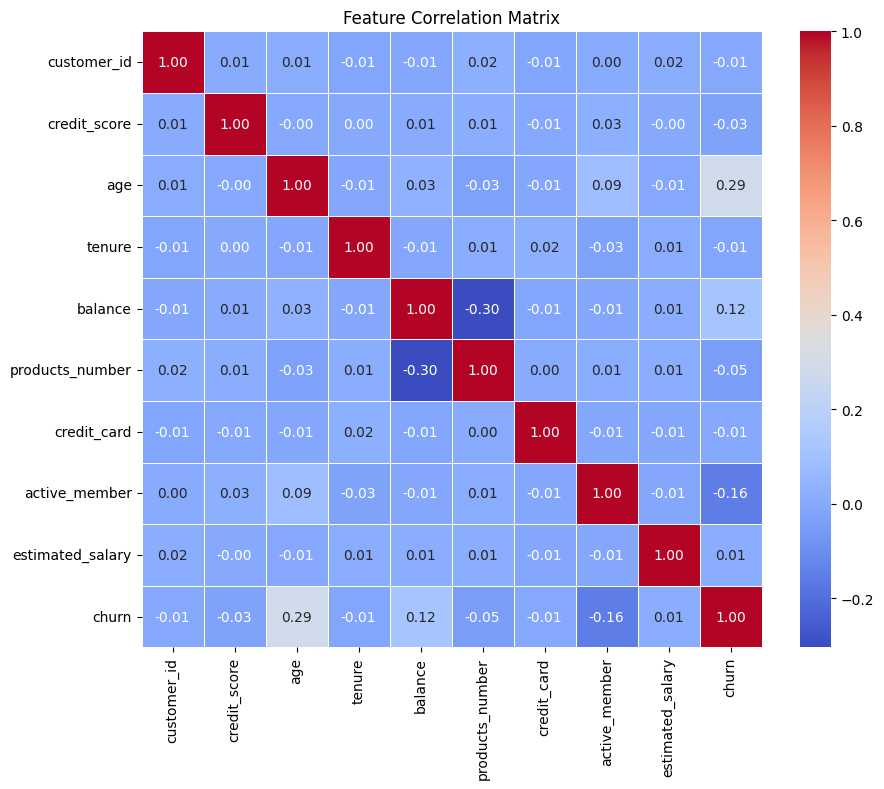

In [ ]:
import numpy as np

# Compute correlation matrix
numerical_features = df.select_dtypes(include=np.number).columns
corr_matrix = df[numerical_features].corr()  # Calculate correlation only for numerical features
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

<ipython-input-40-e0176500a302>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Absolute Coefficient", y="Feature", data=feature_importance, palette="coolwarm")


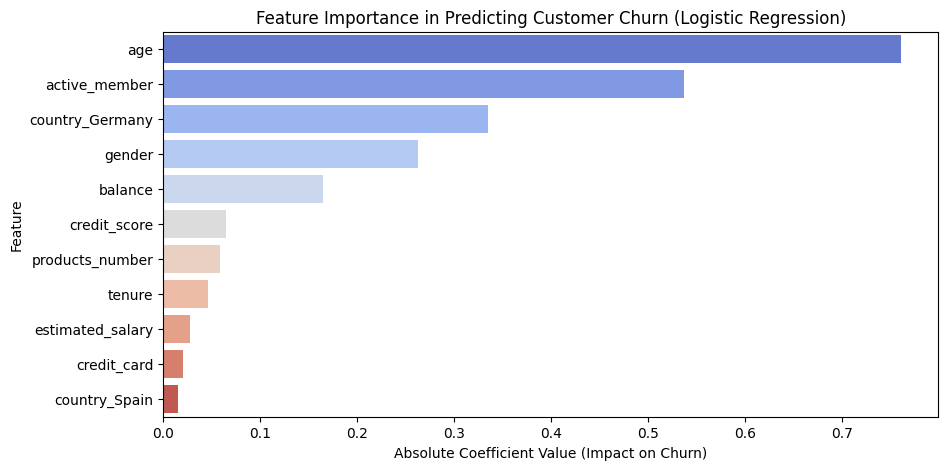

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Load dataset
df = pd.read_csv("/content/Bank Customer Churn Prediction.csv")

df = pd.get_dummies(df, columns=['country'], drop_first=True)
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

# Selecting relevant features (excluding target variable 'Churn')
features = ["credit_score", "gender", "age", "tenure", "balance",
            "products_number", "credit_card", "active_member",
            "estimated_salary", "country_Germany", "country_Spain"]
X = df[features]
y = df["churn"]

# Standardizing numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_scaled, y)

# Extract feature importance (absolute coefficients)
coefficients = log_reg.coef_[0]
feature_importance = pd.DataFrame({"Feature": features, "Coefficient": coefficients})
feature_importance["Absolute Coefficient"] = feature_importance["Coefficient"].abs()
feature_importance = feature_importance.sort_values(by="Absolute Coefficient", ascending=False)

# Plot feature importance
plt.figure(figsize=(10,5))
sns.barplot(x="Absolute Coefficient", y="Feature", data=feature_importance, palette="coolwarm")
plt.title("Feature Importance in Predicting Customer Churn (Logistic Regression)")
plt.xlabel("Absolute Coefficient Value (Impact on Churn)")
plt.ylabel("Feature")
plt.show()